In [1]:
# import all library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import keras
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [2]:
# load fashion mnist data 
(x_train_original, y_train_original), (x_test_original, y_test_original) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# define function for labels
def labels(label_number):
  if label_number == 0:
    class_label = 'T-shirt/top'
  elif label_number == 1:
    class_label = 'Trouser'  
  elif label_number == 2:
    class_label = 'Pullover' 
  elif label_number == 3:
    class_label = 'Dress' 
  elif label_number == 4:
    class_label = 'Coat' 
  elif label_number == 5:
    class_label = 'Sandal' 
  elif label_number == 6:
    class_label = 'Shirt' 
  elif label_number == 7:
    class_label = 'Sneaker'
  elif label_number == 8:
    class_label = 'Bag' 
  else :
    class_label = 'Ankle boot'
  return class_label  

Text(0.5, 1.0, 'Sandal')

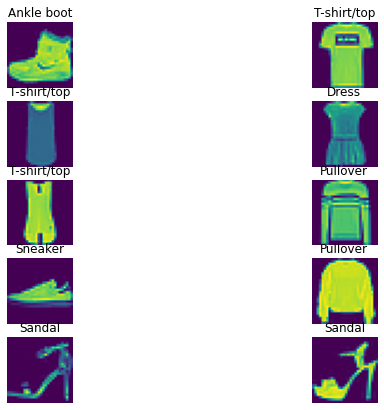

In [4]:
# show image
# create figure
fig = plt.figure(figsize=(10, 7))
rows = 5
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(x_train_original[0])
plt.axis('off')
plt.title(labels(y_train_original[0]))
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(x_train_original[1])
plt.axis('off')
plt.title(labels(y_train_original[1]))
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(x_train_original[2])
plt.axis('off')
plt.title(labels(y_train_original[2]))
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(x_train_original[3])
plt.axis('off')
plt.title(labels(y_train_original[3]))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(x_train_original[4])
plt.axis('off')
plt.title(labels(y_train_original[4]))
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(x_train_original[5])
plt.axis('off')
plt.title(labels(y_train_original[5]))
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(x_train_original[6])
plt.axis('off')
plt.title(labels(y_train_original[6]))
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(x_train_original[7])
plt.axis('off')
plt.title(labels(y_train_original[7]))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 9)
  
# showing image
plt.imshow(x_train_original[8])
plt.axis('off')
plt.title(labels(y_train_original[8]))
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 10)
  
# showing image
plt.imshow(x_train_original[9])
plt.axis('off')
plt.title(labels(y_train_original[9]))

In [5]:
# Getting images shape
print(x_train_original.shape)
print(x_test_original.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# Preprocess input data
''' input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


# Preprocess class labels
y_train = to_categorical(y_train_original, num_classes=10)
y_test = to_categorical(y_test_original, num_classes=10)


# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

In [7]:
# Define model architecture

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, mode='auto')
# This callback will stop the training when there is no improvement in  
# the accuracy for three consecutive epochs.  

model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D((3, 3), strides=(1, 1)))

model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(3, 3), strides=(1, 1)))

model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(3, 3), strides=(1, 1)))

model.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       2

In [8]:
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# Fit model on training data
history = model.fit(x_train, y_train, epochs=12, batch_size=32, validation_data=(x_val, y_val), callbacks=[callback])

Epoch 1/12
1875/1875 [==============================] - 57s 28ms/step - loss: 0.8583 - accuracy: 0.6786 - val_loss: 0.5883 - val_accuracy: 0.8100
Epoch 2/12
1875/1875 [==============================] - 52s 28ms/step - loss: 0.4623 - accuracy: 0.8255 - val_loss: 0.4024 - val_accuracy: 0.8800
Epoch 3/12
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3871 - accuracy: 0.8558 - val_loss: 0.3084 - val_accuracy: 0.8900
Epoch 4/12
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3413 - accuracy: 0.8731 - val_loss: 0.3562 - val_accuracy: 0.8800
Epoch 5/12
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3126 - accuracy: 0.8829 - val_loss: 0.3283 - val_accuracy: 0.8950
Epoch 6/12
1875/1875 [==============================] - 52s 27ms/step - loss: 0.2880 - accuracy: 0.8942 - val_loss: 0.2944 - val_accuracy: 0.9050
Epoch 7/12
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2614 - accuracy: 0.9032 - val_loss: 0.3498 -

<AxesSubplot:>

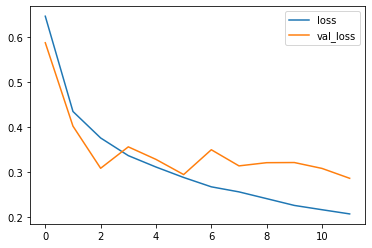

In [9]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()

<AxesSubplot:>

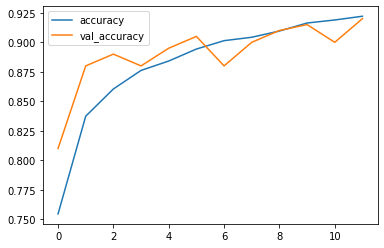

In [10]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

In [11]:
# saving model
model.save('HW3-MonirKhosravi.h5')